In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#converting columns 'Year' into date data type and re-indexing index

prices = pd.read_csv('prices_retail_opioids', index_col = 'Year', parse_dates=['Year'])

#dropping NaN values in 'Typical column'
prices1 = prices.dropna(subset=['Typical'])
#prices1.head(4)

#converting columns Typical' into integer data type
prices1.Typical = pd.to_numeric(prices1.Typical, errors='coerce').fillna(0).astype(np.int64)

#deleting 0 values

prices2 = prices1[prices1.Typical != 0]
prices2.head(5)

,Country,Sub Region,Drug,Drug Group,Unit,Typical
Year,,,,,,
2016-01-01,Belarus,Eastern Europe,Pharmaceutical opioids,Opioids,Gram,100
2016-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,60
2013-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,40
2012-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,40
2014-01-01,Republic of Moldova,Eastern Europe,Heroin,Opioids,Gram,182


In [11]:
#resampling by Year + calculating mean and rounding it 
#total mean for all the countries in each year
prices2.resample('Y').mean().round(2)

,Typical
Year,
2012-12-31,81.82
2013-12-31,80.97
2014-12-31,71.18
2015-12-31,58.05
2016-12-31,63.59


In [33]:
#finding max price for country in 2016 and filtering per heroin

##slicing dataset
country_val = prices2.loc['2011':'2016', 'Country':'Typical']

## filtering by 'Drug'
country_vals = country_val[country_val['Drug']=='Heroin']

country_vals.columns = ['country','subregion','drug', 'd_group', 'unit', 'Typical']
country_vals.head(10)

,country,subregion,drug,d_group,unit,Typical
Year,,,,,,
2016-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,60
2013-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,40
2012-01-01,Belarus,Eastern Europe,Heroin,Opioids,Gram,40
2014-01-01,Republic of Moldova,Eastern Europe,Heroin,Opioids,Gram,182
2015-01-01,Russian Federation,Eastern Europe,Heroin,Opioids,Gram,36
2014-01-01,Russian Federation,Eastern Europe,Heroin,Opioids,Gram,51
2013-01-01,Russian Federation,Eastern Europe,Heroin,Opioids,Gram,75
2012-01-01,Russian Federation,Eastern Europe,Heroin,Opioids,Gram,79
2014-01-01,Ukraine,Eastern Europe,Heroin,Opioids,Gram,109


In [18]:
country_vals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
Country       0 non-null object
Sub Region    0 non-null object
Drug          0 non-null object
Drug Group    0 non-null object
Unit          0 non-null object
Typical       0 non-null int64
dtypes: int64(1), object(5)
memory usage: 0.0+ bytes


In [35]:
## grouping by
new = country_vals.groupby('Year').count()
new

,Country,Sub Region,Drug,Drug Group,Unit,Typical
Year,,,,,,
2012-01-01,33,33,33,33,33,33
2013-01-01,29,29,29,29,29,29
2014-01-01,29,29,29,29,29,29
2015-01-01,32,32,32,32,32,32
2016-01-01,26,26,26,26,26,26


In [41]:
#calculating moving avg plus groupby

#date_y['Country'].unique()

avg_moving = country_vals.groupby(['Year'])['Typical'].mean().round(2)
avg_moving

Year
2012-01-01    94.18
2013-01-01    80.55
2014-01-01    79.93
2015-01-01    66.69
2016-01-01    75.38
Name: Typical, dtype: float64

In [42]:
new = pd.DataFrame({'avg_moving':avg_moving})

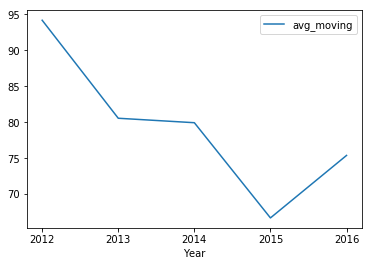

In [43]:
new.plot()
plt.show()

In [44]:
#calculating Heroin avg price over year for MENA countries

#filtering data set for 2 values in 1 column

mena = country_vals.loc[(country_vals['subregion'] == 'Near and Middle East/ South-West Asia') | (country_vals['subregion'] == 'Northern Africa')]

In [93]:
mena.head(5)
mena.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2015-01-01 to 2013-01-01
Data columns (total 6 columns):
country      19 non-null object
subregion    19 non-null object
drug         19 non-null object
d_group      19 non-null object
unit         19 non-null object
Typical      19 non-null int64
dtypes: int64(1), object(5)
memory usage: 1.0+ KB


In [73]:
g_mena = mena.groupby(['Year'])['Typical'].mean().round(2)
g_mena.head(4)

Year
2012-01-01    48.67
2013-01-01    33.00
2014-01-01     5.50
2015-01-01    40.83
Name: Typical, dtype: float64

In [98]:
byc = mena.rolling(window=19).mean()
byc.groupby(['country']).mean()

,Typical
country,
Afghanistan,NaN
Algeria,NaN
Iran (Islamic Republic of),NaN
Lebanon,NaN
Morocco,44.473684
Pakistan,NaN
Saudi Arabia,NaN
United Arab Emirates,NaN
